In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("depression_data.csv")


In [ ]:
# This notebooks summarises the wor

In [3]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [4]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [6]:
df.isna().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [7]:
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


# Categorical:
-    'Marital Status'
-    'Education Level',
-    'Number of Children'
-    'Smoking Status', 
-    'Physical Activity Level',
-    'Employment Status', 
-    'Alcohol Consumption', 
-    'Dietary Habits',
-    'Sleep Patterns', 
-    'History of Mental Illness',
-    'History of Substance Abuse', 
-    'Family History of Depression',
-    'Chronic Medical Conditions', 
-    'Age_Group'
    
# Non-Categorical:
- Name
- Age
- Income

In [9]:
import pandas as pd

bins = [0, 12, 19, 35, 60, 100] 
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

categorical_columns = [
    'Marital Status', 'Education Level', 'Number of Children', 'Smoking Status',
    'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
    'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions', 'Age_Group'
]

# Ensure the specified columns are of type 'category'
for column in categorical_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        df[column] = df[column].astype('category')

categorical_columns = df.select_dtypes(include=['category']).columns

# Print value counts for each categorical column
for column in categorical_columns:
    print(f"Distribution for {column}:")
    print(df[column].value_counts())
    print("\n")


Distribution for Marital Status:
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64


Distribution for Education Level:
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64


Distribution for Number of Children:
Number of Children
0    155232
2     83961
1     83925
3     76974
4     13676
Name: count, dtype: int64


Distribution for Smoking Status:
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64


Distribution for Physical Activity Level:
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64


Distribution for Employment Status:
Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64


Distribution for Alcohol Consumption:
Alcohol Consumption
Moderate   

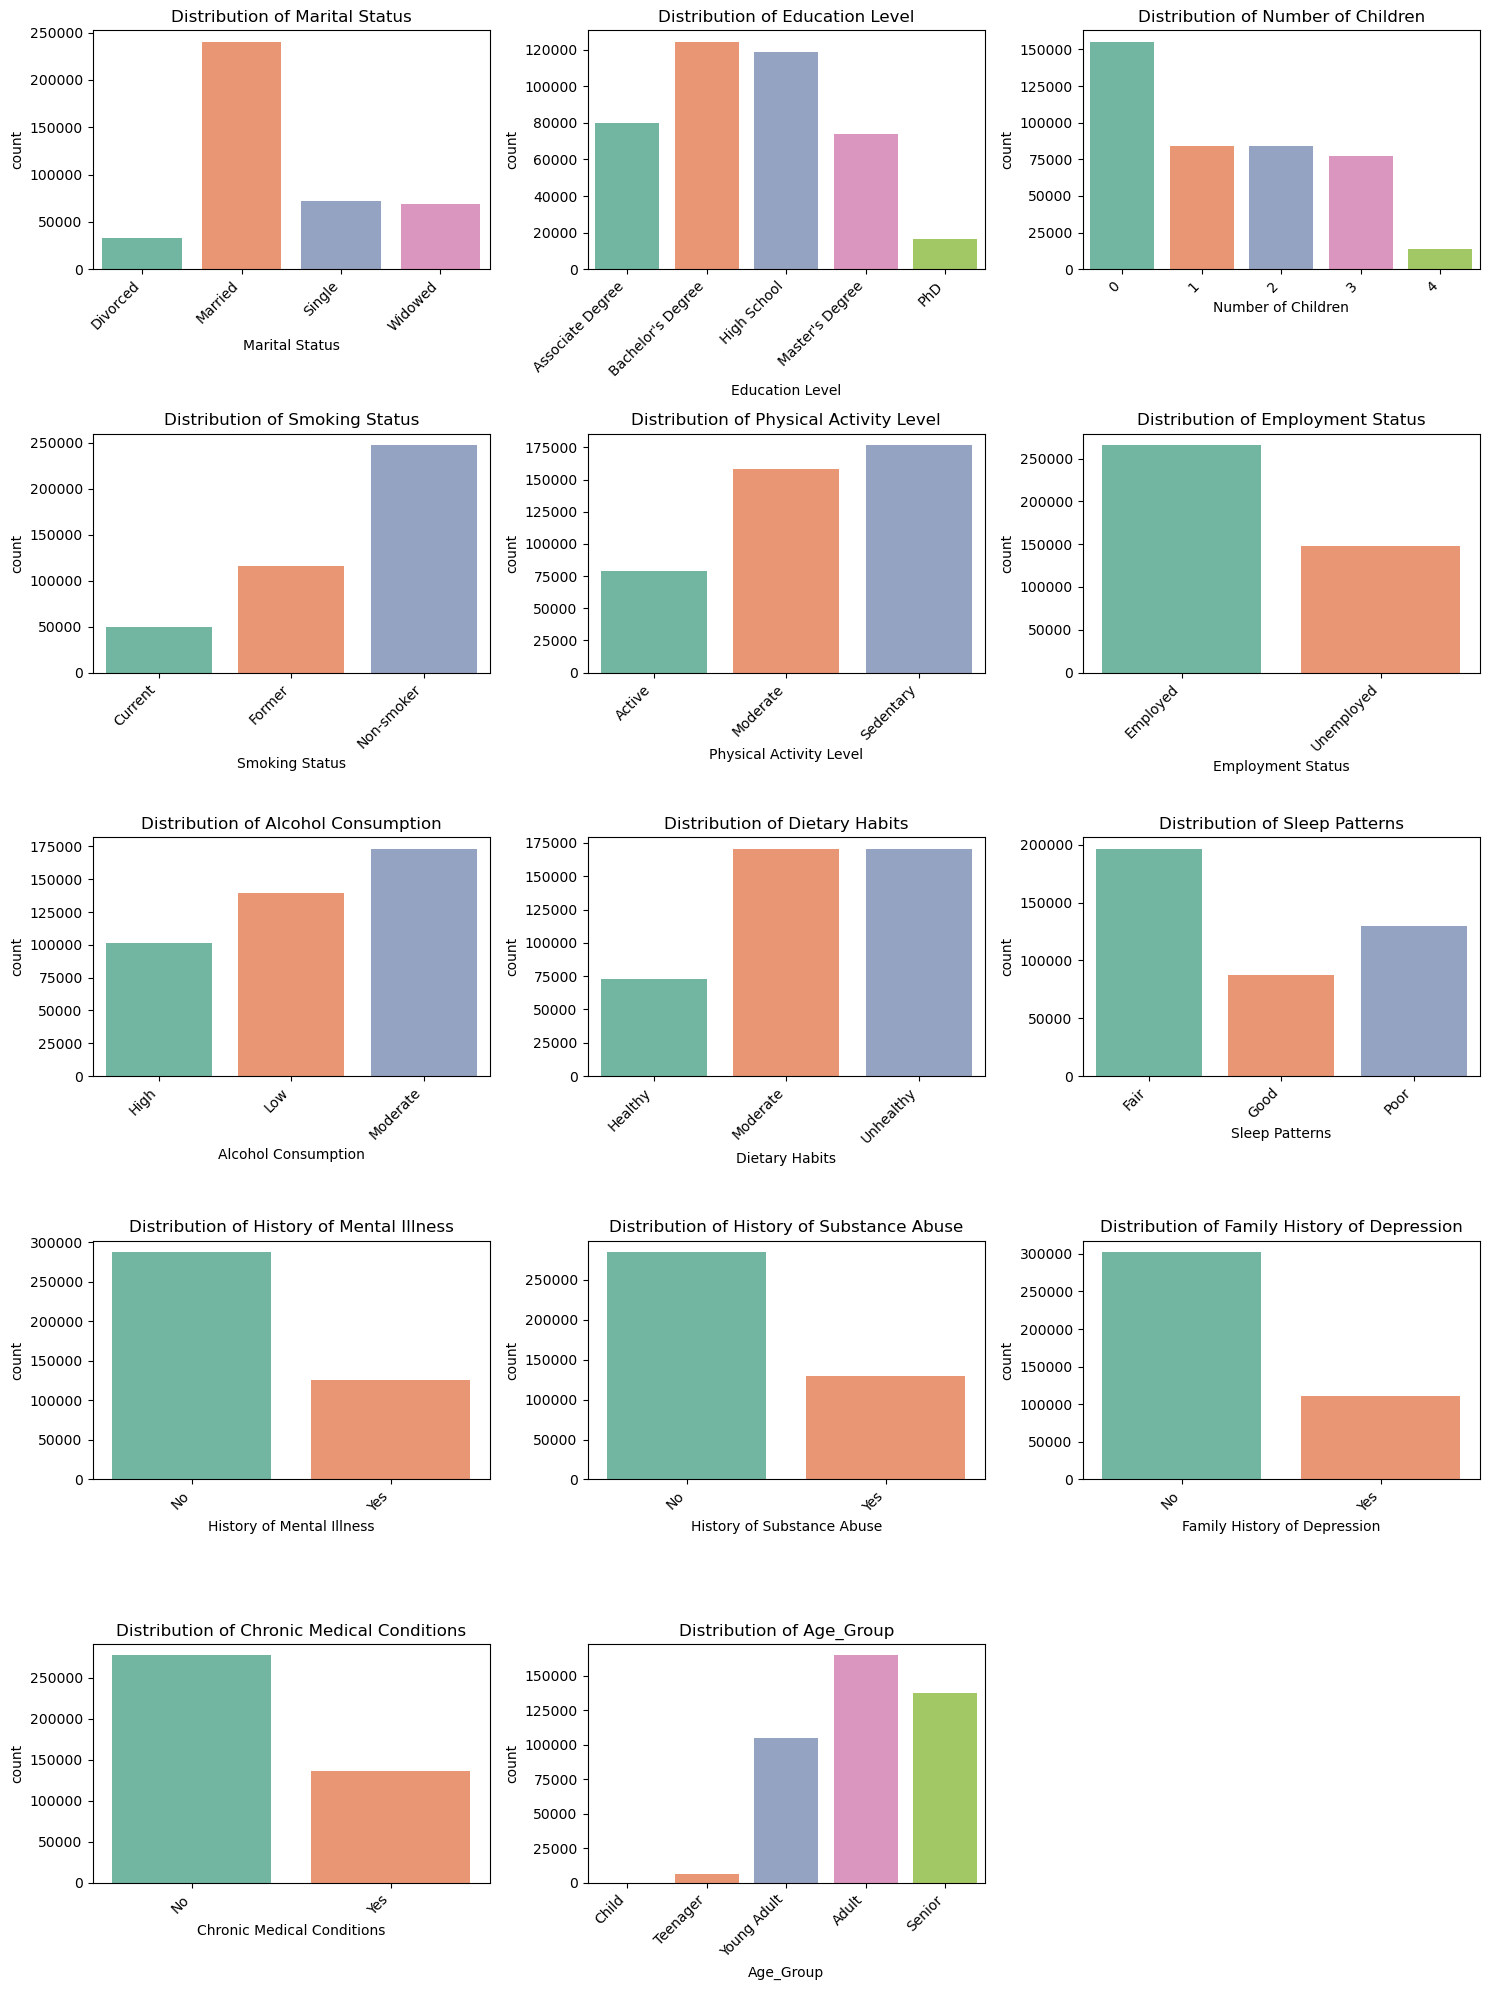

In [10]:
import math

num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust number of rows to fit all plots

plt.figure(figsize=(15, num_rows * 4))

# Loop through all categorical columns and plot the distributions
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the subplot grid dynamically
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

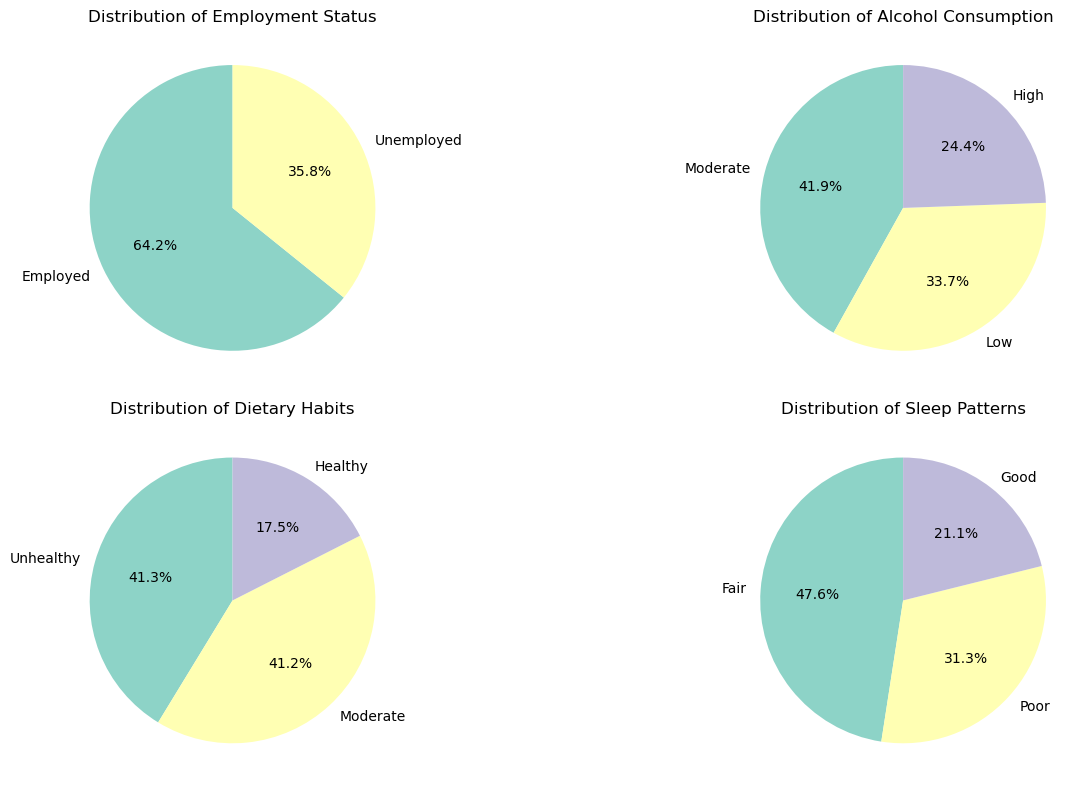

In [15]:
columns_to_plot = ['Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']

num_cols = 2
num_rows = math.ceil(len(columns_to_plot) / num_cols)

plt.figure(figsize=(15, num_rows * 4))  # Adjust figure size dynamically

# Loop through the columns and create subplots
for idx, column in enumerate(columns_to_plot, start=1):
    if column in df.columns:
        plt.subplot(num_rows, num_cols, idx)
        if df[column].dtype.name == 'category' or df[column].dtype == 'object':
            # For categorical columns, calculate value counts
            data_counts = df[column].value_counts()
            plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, 
                    colors=sns.color_palette("Set3", len(data_counts)))
            plt.title(f'Distribution of {column}')


plt.tight_layout()
plt.show()
